In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col1 = '#ff4b44'
col2 = '#00a0de'
violet = '#a369ff'

line_color = 'k'
bg_color = '#f5f5f5'

# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("D:\FData\Euro2024\Till_SF.csv")

In [67]:
df = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL_2023_2024GW01_to_GW38.csv")

In [3]:
def get_short_name(full_name):
    if not isinstance(full_name, str):
        return None  # Return None if the input is not a string
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Progression

In [73]:
# unique_players = df['name'].unique()
df_cb = df[df['position']=='DC']
unique_players = df_cb['name'].unique()

# Top Ball Progressor
# Initialize an empty dictionary to store home players different type of pass counts
progressor_counts = {'name': unique_players, 'Progressive Passes': [], 'Progressive Carries': []}
for name in unique_players:
    dfp = df[(df['name']==name) & (df['outcomeType']=='Successful')]
    progressor_counts['Progressive Passes'].append(len(dfp[(dfp['prog_pass'] >= 9.144) & (dfp['x']>=35) & 
                                                           (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    progressor_counts['Progressive Carries'].append(len(dfp[(dfp['prog_carry'] >= 9.144) & (dfp['endX']>=35)]))
    
progressor_df = pd.DataFrame(progressor_counts)
progressor_df['total'] = progressor_df['Progressive Passes']+progressor_df['Progressive Carries']
progressor_df = progressor_df.sort_values(by='total', ascending=False)
progressor_df.reset_index(drop=True, inplace=True)
progressor_df = progressor_df.head(20)
progressor_df['shortName'] = progressor_df['name'].apply(get_short_name)
progressor_df

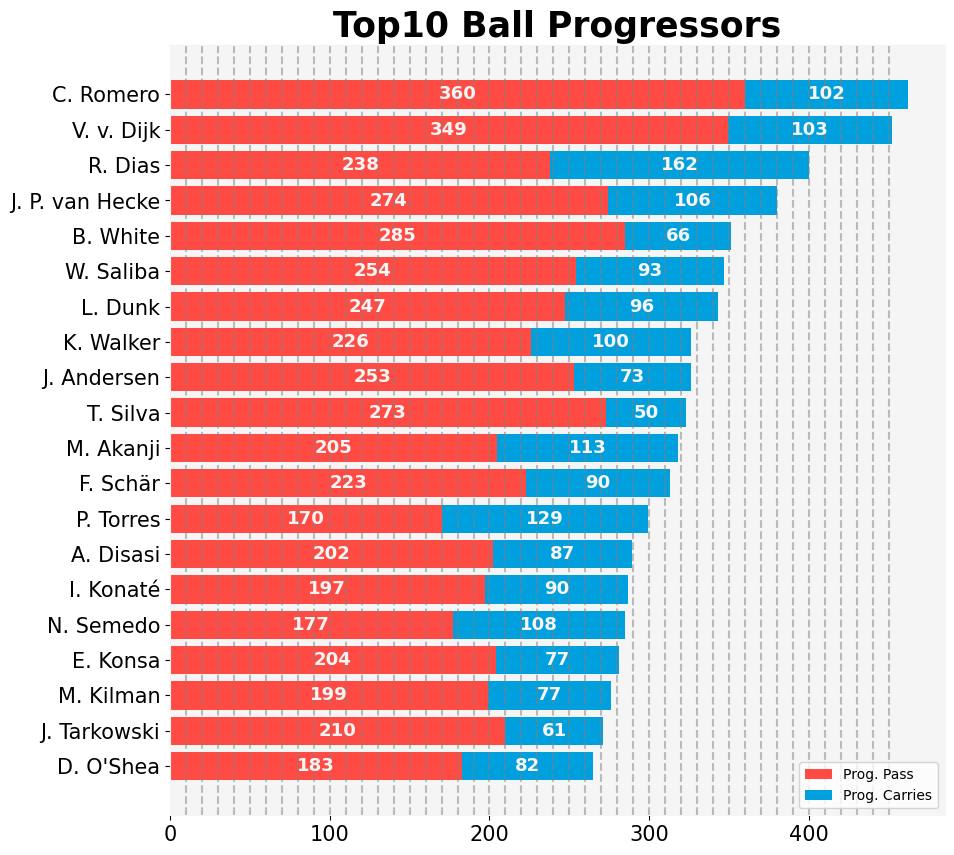

In [75]:
def passer_bar(ax):
    top10_passers = progressor_df.nsmallest(20, 'total')['shortName'].tolist()

    passers_pp = progressor_df.nsmallest(20, 'total')['Progressive Passes'].tolist()
    passers_tp = progressor_df.nsmallest(20, 'total')['Progressive Carries'].tolist()

    # left1 = [w + x for w, x in zip(passers_pp, passers_tp)]
    # left2 = [w + x + z for w, x, z in zip(passers_pp, passers_tp, passers_pe)]

    ax.barh(top10_passers, passers_pp, label='Prog. Pass', color=col1, left=0)
    ax.barh(top10_passers, passers_tp, label='Prog. Carries', color=col2, left=passers_pp)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top10_passers):
        for j, count in enumerate([passers_pp[i], passers_tp[i]]):
            if count > 0:
                x_position = sum([passers_pp[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=13, fontweight='bold')

    max_x = progressor_df['total'].iloc()[0]
    x_coord = [10 * i for i in range(1, int(max_x/10))]
    for x in x_coord:
        ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    ax.set_title(f"Top10 Ball Progressors", color=line_color, fontsize=25, fontweight='bold')
    ax.legend()

fig,ax=plt.subplots(figsize=(10,10))
passer_bar(ax)

# Entry

In [31]:
unique_players = df['name'].unique()
# Top Ball Progressor
# Initialize an empty dictionary to store home players different type of pass counts
entry_counts = {'name': unique_players, 'Final_Third_Entry_By_Pass': [], 'Final_Third_Entry_By_Carry': [], 'Box_Entry_By_Pass': [], 
                'Box_Entry_By_Carry': []}
for name in unique_players:
    dfp = df[(df['name']==name) & (df['outcomeType']=='Successful')]
    entry_counts['Final_Third_Entry_By_Pass'].append(len(dfp[(dfp['x']<70) & (dfp['endX']>=70) & (dfp['type']=='Pass') &
                                                        (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    entry_counts['Final_Third_Entry_By_Carry'].append(len(dfp[(dfp['x']<70) & (dfp['endX']>=70) & (dfp['type']=='Carry') &
                                                        (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    entry_counts['Box_Entry_By_Pass'].append(len(dfp[(dfp['type']=='Pass') & (dfp['endX']>=88.5) &
                 ~((dfp['x']>=88.5) & (dfp['y']>=13.6) & (dfp['y']<=54.6)) & (dfp['endY']>=13.6) & (dfp['endY']<=54.4) &
                  (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    entry_counts['Box_Entry_By_Carry'].append(len(dfp[(dfp['type']=='Carry') & (dfp['endX']>=88.5) &
                 ~((dfp['x']>=88.5) & (dfp['y']>=13.6) & (dfp['y']<=54.6)) & (dfp['endY']>=13.6) & (dfp['endY']<=54.4) &
                  (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
entry_df = pd.DataFrame(entry_counts)
entry_df['total'] = (entry_df['Final_Third_Entry_By_Pass']+entry_df['Final_Third_Entry_By_Carry']+entry_df['Box_Entry_By_Pass']+
                    entry_df['Box_Entry_By_Carry'])
entry_df = entry_df.sort_values(by='total', ascending=False)
entry_df.reset_index(drop=True, inplace=True)
entry_df = entry_df.head(10)
# entry_df['shortName'] = entry_df['name'].apply(get_short_name)
entry_df

,name,Final_Third_Entry_By_Pass,Final_Third_Entry_By_Carry,Box_Entry_By_Pass,Box_Entry_By_Carry,total,shortName
0,Toni Kroos,74,9,5,0,88,T. Kroos
1,Aurélien Tchouaméni,70,4,4,0,78,A. Tchouaméni
2,Granit Xhaka,56,8,4,1,69,G. Xhaka
3,Aymeric Laporte,47,11,2,0,60,A. Laporte
4,N'Golo Kanté,41,9,8,2,60,N. Kanté
5,Antonio Rüdiger,43,6,10,0,59,A. Rüdiger
6,Kyle Walker,47,5,3,2,57,K. Walker
7,Declan Rice,46,7,4,0,57,D. Rice
8,Joshua Kimmich,30,10,17,0,57,J. Kimmich
9,Fabián Ruiz,40,9,6,1,56,F. Ruiz


In [33]:
unique_teams = df['teamName'].unique()
# Top Ball Progressor
# Initialize an empty dictionary to store home players different type of pass counts
entry_counts = {'teamName': unique_teams, 'Final_Third_Entry_By_Pass': [], 'Final_Third_Entry_By_Carry': [], 'Box_Entry_By_Pass': [], 
                'Box_Entry_By_Carry': []}
for name in unique_teams:
    dfp = df[(df['teamName']==name) & (df['outcomeType']=='Successful')]
    entry_counts['Final_Third_Entry_By_Pass'].append(len(dfp[(dfp['x']<70) & (dfp['endX']>=70) & (dfp['type']=='Pass') &
                                                        (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    entry_counts['Final_Third_Entry_By_Carry'].append(len(dfp[(dfp['x']<70) & (dfp['endX']>=70) & (dfp['type']=='Carry') &
                                                        (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    entry_counts['Box_Entry_By_Pass'].append(len(dfp[(dfp['type']=='Pass') & (dfp['endX']>=88.5) &
                 ~((dfp['x']>=88.5) & (dfp['y']>=13.6) & (dfp['y']<=54.6)) & (dfp['endY']>=13.6) & (dfp['endY']<=54.4) &
                  (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
    entry_counts['Box_Entry_By_Carry'].append(len(dfp[(dfp['type']=='Carry') & (dfp['endX']>=88.5) &
                 ~((dfp['x']>=88.5) & (dfp['y']>=13.6) & (dfp['y']<=54.6)) & (dfp['endY']>=13.6) & (dfp['endY']<=54.4) &
                  (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))]))
entry_df = pd.DataFrame(entry_counts)
entry_df['total'] = (entry_df['Final_Third_Entry_By_Pass']+entry_df['Final_Third_Entry_By_Carry']+entry_df['Box_Entry_By_Pass']+
                    entry_df['Box_Entry_By_Carry'])
entry_df = entry_df.sort_values(by='total', ascending=False)
entry_df.reset_index(drop=True, inplace=True)
entry_df = entry_df.head(10)
# entry_df['shortName'] = entry_df['name'].apply(get_short_name)
entry_df

,teamName,Final_Third_Entry_By_Pass,Final_Third_Entry_By_Carry,Box_Entry_By_Pass,Box_Entry_By_Carry,total
0,Portugal,308,109,59,30,506
1,France,298,76,65,44,483
2,Spain,264,104,63,28,459
3,Germany,268,78,73,22,441
4,England,268,79,57,26,430
5,Netherlands,230,59,50,28,367
6,Switzerland,195,47,33,28,303
7,Turkiye,160,60,31,25,276
8,Austria,160,60,41,14,275
9,Italy,143,56,37,10,246


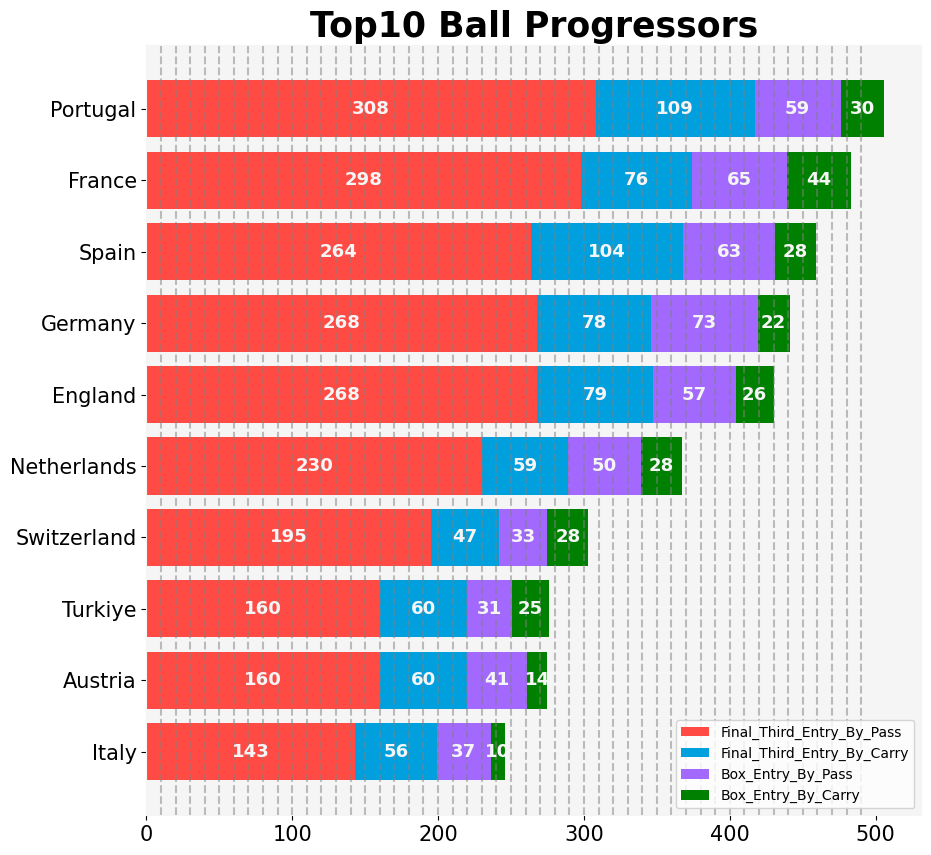

In [34]:
def passer_bar(ax):
    top10_passers = entry_df.nsmallest(10, 'total')['teamName'].tolist()

    passers_fep = entry_df.nsmallest(10, 'total')['Final_Third_Entry_By_Pass'].tolist()
    passers_fec = entry_df.nsmallest(10, 'total')['Final_Third_Entry_By_Carry'].tolist()
    passers_bep = entry_df.nsmallest(10, 'total')['Box_Entry_By_Pass'].tolist()
    passers_bec = entry_df.nsmallest(10, 'total')['Box_Entry_By_Carry'].tolist()

    left1 = [w + x for w, x in zip(passers_fep, passers_fec)]
    left2 = [w + x + z for w, x, z in zip(passers_fep, passers_fec, passers_bep)]

    ax.barh(top10_passers, passers_fep, label='Final_Third_Entry_By_Pass', color=col1, left=0)
    ax.barh(top10_passers, passers_fec, label='Final_Third_Entry_By_Carry', color=col2, left=passers_fep)
    ax.barh(top10_passers, passers_bep, label='Box_Entry_By_Pass', color=violet, left=left1)
    ax.barh(top10_passers, passers_bec, label='Box_Entry_By_Carry', color='g', left=left2)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top10_passers):
        for j, count in enumerate([passers_fep[i], passers_fec[i], passers_bep[i], passers_bec[i]]):
            if count > 0:
                x_position = sum([passers_fep[i], passers_fec[i], passers_bep[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=13, fontweight='bold')

    max_x = entry_df['total'].iloc()[0]
    x_coord = [10 * i for i in range(1, int(max_x/10))]
    for x in x_coord:
        ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    ax.set_title(f"Top10 Teams Entry", color=line_color, fontsize=25, fontweight='bold')
    ax.legend()

fig,ax=plt.subplots(figsize=(10,10))
passer_bar(ax)

# Shot Types

In [21]:
unique_teams = df['teamName'].unique()
# Top Ball Progressor
# Initialize an empty dictionary to store home players different type of pass counts
shot_type_counts = {'teamName': unique_teams, 'Regular_Play': [], 'Set_Play': [], 'From_Corner': [], 
                'Fast_Break': []}
for name in unique_teams:
    dfp = df[(df['teamName']==name) & (df['type'].str.contains('Shot|Goal'))]
    shot_type_counts['Regular_Play'].append(len(dfp[(dfp['qualifiers'].str.contains('RegularPlay'))]))
    shot_type_counts['Set_Play'].append(len(dfp[(dfp['qualifiers'].str.contains('SetPiece'))]))
    shot_type_counts['From_Corner'].append(len(dfp[(dfp['qualifiers'].str.contains('FromCorner'))]))
    shot_type_counts['Fast_Break'].append(len(dfp[(dfp['qualifiers'].str.contains('FastBreak'))]))
shot_type_df = pd.DataFrame(shot_type_counts)
shot_type_df['total'] = (shot_type_df['Regular_Play']+shot_type_df['Set_Play']+shot_type_df['From_Corner']+shot_type_df['Fast_Break'])
shot_type_df = shot_type_df.sort_values(by='total', ascending=False)
shot_type_df.reset_index(drop=True, inplace=True)
shot_type_df = shot_type_df.head(20)
# shot_type_df['shortName'] = shot_type_df['name'].apply(get_short_name)
shot_type_df

,teamName,Regular_Play,Set_Play,From_Corner,Fast_Break,total
0,Real Madrid,428,23,83,36,570
1,Barcelona,418,22,108,19,567
2,Real Betis,333,24,99,21,477
3,Sevilla,299,53,90,32,474
4,Atletico,352,31,59,24,466
5,Girona,343,28,76,17,464
6,Almeria,320,42,63,33,458
7,Celta Vigo,324,34,69,29,456
8,Athletic Club,331,25,80,19,455
9,Villarreal,332,21,81,21,455


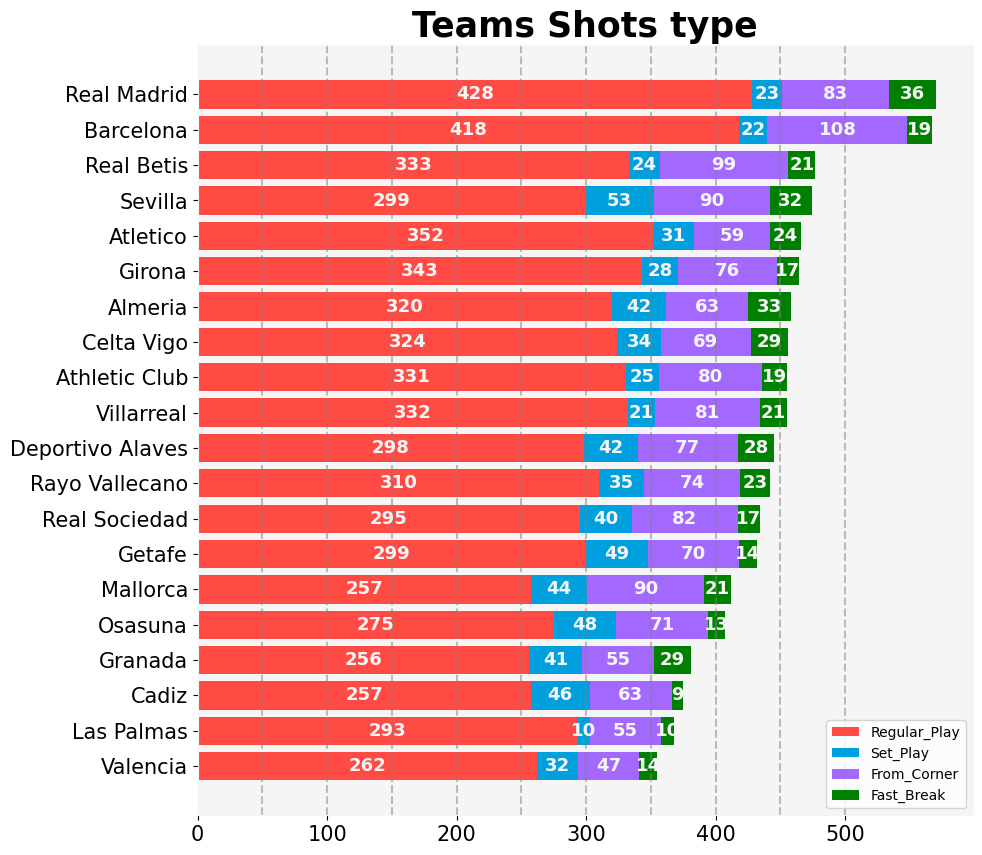

In [22]:
def passer_bar(ax):
    top10_teams = shot_type_df.nsmallest(20, 'total')['teamName'].tolist()

    list_1 = shot_type_df.nsmallest(20, 'total')['Regular_Play'].tolist()
    list_2 = shot_type_df.nsmallest(20, 'total')['Set_Play'].tolist()
    list_3 = shot_type_df.nsmallest(20, 'total')['From_Corner'].tolist()
    list_4 = shot_type_df.nsmallest(20, 'total')['Fast_Break'].tolist()

    left1 = [w + x for w, x in zip(list_1, list_2)]
    left2 = [w + x + z for w, x, z in zip(list_1, list_2, list_3)]

    ax.barh(top10_teams, list_1, label='Regular_Play', color=col1, left=0)
    ax.barh(top10_teams, list_2, label='Set_Play', color=col2, left=list_1)
    ax.barh(top10_teams, list_3, label='From_Corner', color=violet, left=left1)
    ax.barh(top10_teams, list_4, label='Fast_Break', color='g', left=left2)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top10_teams):
        for j, count in enumerate([list_1[i], list_2[i], list_3[i], list_4[i]]):
            if count > 0:
                x_position = sum([list_1[i], list_2[i], list_3[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=13, fontweight='bold')

    max_x = shot_type_df['total'].iloc()[0]
    x_coord = [50 * i for i in range(1, int(max_x/50))]
    for x in x_coord:
        ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    ax.set_title(f"Teams Shots type", color=line_color, fontsize=25, fontweight='bold')
    ax.legend()

fig,ax=plt.subplots(figsize=(10,10))
passer_bar(ax)

# Top Defenders

In [76]:
unique_players = df['name'].unique()
# Top Ball Progressor
# Initialize an empty dictionary to store home players different type of pass counts
def_acts_counts = {'name': unique_players, 'Tackles': [], 'Interceptions': [], 'Clearance': []}
for name in unique_players:
    dfp = df[(df['name']==name) & (df['outcomeType']=='Successful')]
    def_acts_counts['Tackles'].append(len(dfp[(dfp['type']=='Tackle')]))
    def_acts_counts['Interceptions'].append(len(dfp[(dfp['type']=='Interception')]))
    def_acts_counts['Clearance'].append(len(dfp[(dfp['type']=='Clearance')]))
    
def_acts_df = pd.DataFrame(def_acts_counts)
def_acts_df['total'] = (def_acts_df['Tackles']+def_acts_df['Interceptions']+def_acts_df['Clearance'])
def_acts_df = def_acts_df.sort_values(by='total', ascending=False)
def_acts_df.reset_index(drop=True, inplace=True)
def_acts_df = def_acts_df.head(20)
def_acts_df['shortName'] = def_acts_df['name'].apply(get_short_name)
def_acts_df

,name,Tackles,Interceptions,Clearance,total,shortName
0,Joachim Andersen,36,44,203,283,J. Andersen
1,James Tarkowski,42,55,186,283,J. Tarkowski
2,Murillo,33,39,183,255,Murillo
3,Antonee Robinson,56,81,116,253,A. Robinson
4,Jarrad Branthwaite,32,49,163,244,J. Branthwaite
5,Maximilian Kilman,20,35,183,238,M. Kilman
6,Ethan Pinnock,23,43,170,236,E. Pinnock
7,Teden Mengi,22,56,139,217,T. Mengi
8,Auston Trusty,29,34,147,210,A. Trusty
9,Dara O'Shea,19,33,157,209,D. O'Shea


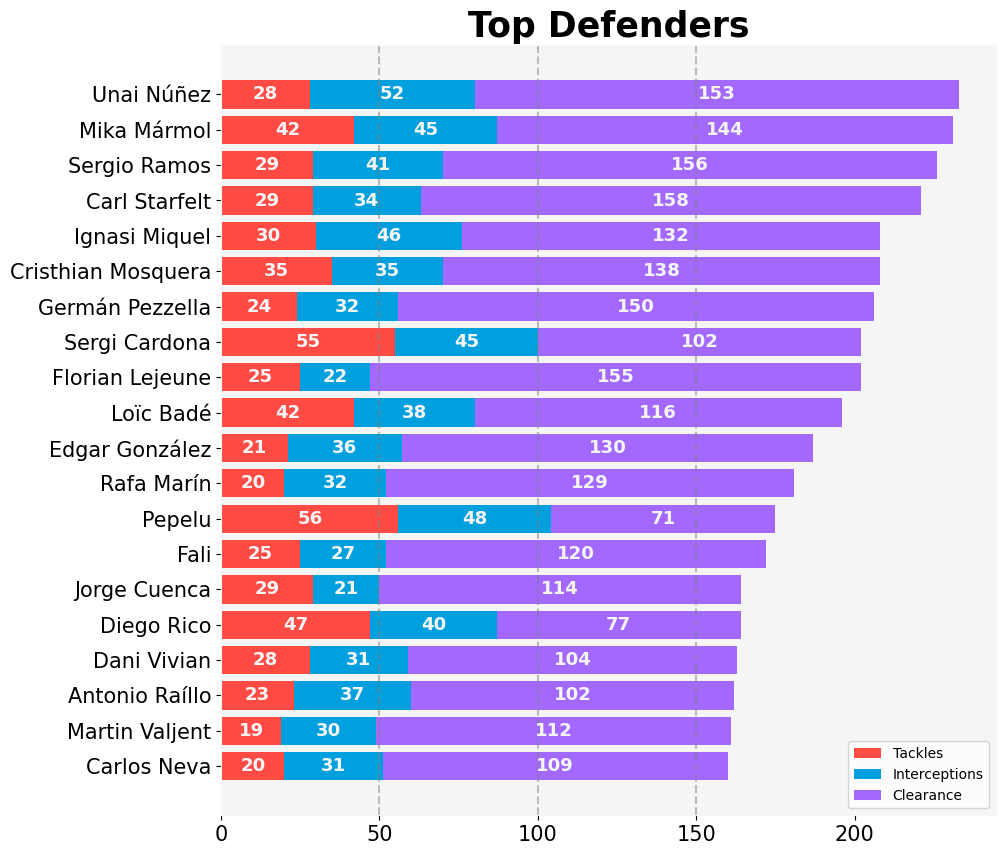

In [26]:
def passer_bar(ax):
    top_players = def_acts_df.nsmallest(20, 'total')['name'].tolist()

    list_1 = def_acts_df.nsmallest(20, 'total')['Tackles'].tolist()
    list_2 = def_acts_df.nsmallest(20, 'total')['Interceptions'].tolist()
    list_3 = def_acts_df.nsmallest(20, 'total')['Clearance'].tolist()

    left1 = [w + x for w, x in zip(list_1, list_2)]

    ax.barh(top_players, list_1, label='Tackles', color=col1, left=0)
    ax.barh(top_players, list_2, label='Interceptions', color=col2, left=list_1)
    ax.barh(top_players, list_3, label='Clearance', color=violet, left=left1)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top_players):
        for j, count in enumerate([list_1[i], list_2[i], list_3[i]]):
            if count > 0:
                x_position = sum([list_1[i], list_2[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=13, fontweight='bold')

    max_x = def_acts_df['total'].iloc()[0]
    x_coord = [50 * i for i in range(1, int(max_x/50))]
    for x in x_coord:
        ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    ax.set_title(f"Top Defenders", color=line_color, fontsize=25, fontweight='bold')
    ax.legend()

fig,ax=plt.subplots(figsize=(10,10))
passer_bar(ax)

# Shot Sequence Involvement

In [77]:
unique_players = df['name'].unique()

# Shot Sequence Involvement
df_no_carry = df[df['type']!='Carry']
# Initialize an empty dictionary to store home players different type of shot sequence counts
shot_seq_counts = {'name': unique_players, 'Shots': [], 'Shot Assist': [], 'Buildup to shot': []}
# Putting counts in those lists
for name in unique_players:
    dfp = df_no_carry[df_no_carry['name']==name]
    shot_seq_counts['Shots'].append(len(dfp[(dfp['name'] == name) & (dfp['type'].str.contains('Shot|Goal'))]))
    shot_seq_counts['Shot Assist'].append(len(dfp[(dfp['name'] == name) & (dfp['type'] == 'Pass') & (dfp['qualifiers'].str.contains('KeyPass'))]))
    shot_seq_counts['Buildup to shot'].append(len(df_no_carry[(df_no_carry['name'] == name) & (df_no_carry['type'] == 'Pass') & (df_no_carry['qualifiers'].shift(-1).str.contains('KeyPass'))]))
# converting that list into a dataframe
sh_sq_df = pd.DataFrame(shot_seq_counts)
sh_sq_df['total'] = sh_sq_df['Shots']+sh_sq_df['Shot Assist']+sh_sq_df['Buildup to shot']
sh_sq_df = sh_sq_df.sort_values(by='total', ascending=False)
sh_sq_df.reset_index(drop=True, inplace=True)
sh_sq_df = sh_sq_df.head(15)
sh_sq_df['shortName'] = sh_sq_df['name'].apply(get_short_name)
sh_sq_df

,name,Shots,Shot Assist,Buildup to shot,total,shortName
0,Bruno Fernandes,95,113,42,250,B. Fernandes
1,Martin Ødegaard,77,99,69,245,M. Ødegaard
2,Bukayo Saka,107,85,47,239,B. Saka
3,Cole Palmer,109,68,41,218,C. Palmer
4,Phil Foden,105,69,36,210,P. Foden
5,Mohamed Salah,114,64,24,202,M. Salah
6,Luis Díaz,94,59,44,197,L. Díaz
7,Pascal Groß,55,99,37,191,P. Groß
8,Son Heung-Min,86,67,33,186,S. Heung-Min
9,Julián Álvarez,98,62,24,184,J. Álvarez


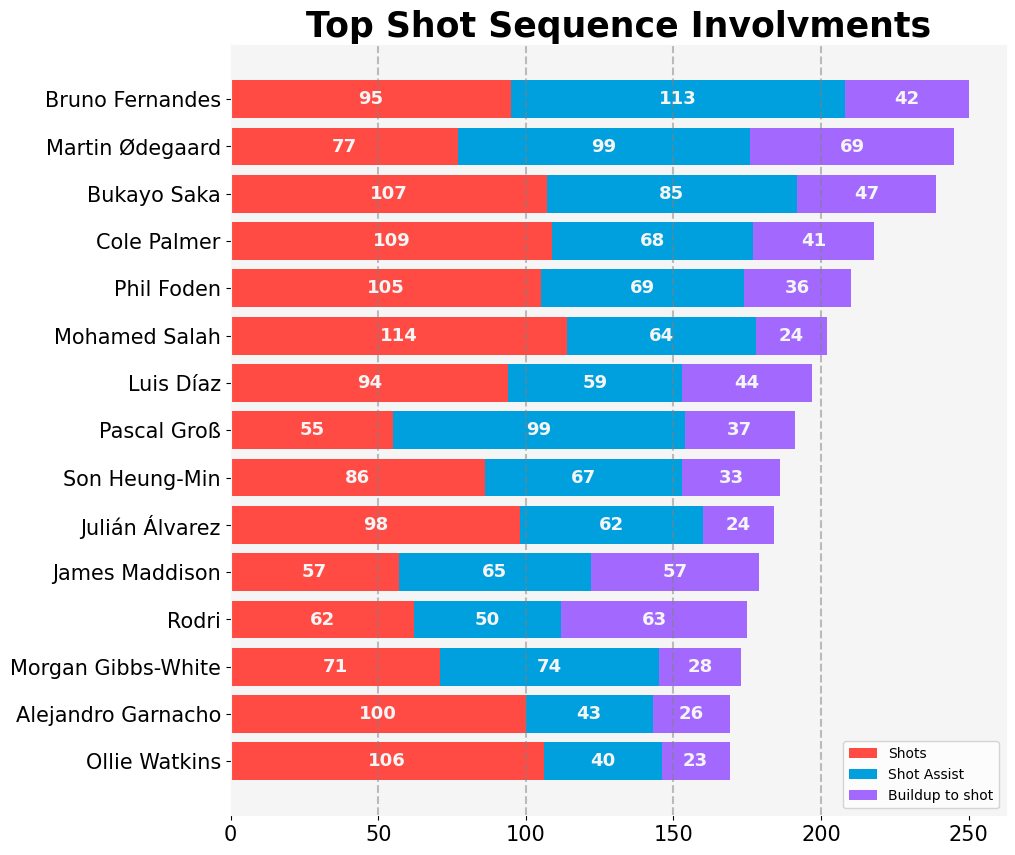

In [78]:
def passer_bar(ax):
    top_players = sh_sq_df.nsmallest(20, 'total')['name'].tolist()

    list_1 = sh_sq_df.nsmallest(20, 'total')['Shots'].tolist()
    list_2 = sh_sq_df.nsmallest(20, 'total')['Shot Assist'].tolist()
    list_3 = sh_sq_df.nsmallest(20, 'total')['Buildup to shot'].tolist()

    left1 = [w + x for w, x in zip(list_1, list_2)]

    ax.barh(top_players, list_1, label='Shots', color=col1, left=0)
    ax.barh(top_players, list_2, label='Shot Assist', color=col2, left=list_1)
    ax.barh(top_players, list_3, label='Buildup to shot', color=violet, left=left1)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top_players):
        for j, count in enumerate([list_1[i], list_2[i], list_3[i]]):
            if count > 0:
                x_position = sum([list_1[i], list_2[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=13, fontweight='bold')

    max_x = sh_sq_df['total'].iloc()[0]
    x_coord = [50 * i for i in range(1, int(max_x/50))]
    for x in x_coord:
        ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    ax.set_title(f"Top Shot Sequence Involvments", color=line_color, fontsize=25, fontweight='bold')
    ax.legend()

fig,ax=plt.subplots(figsize=(10,10))
passer_bar(ax)

# Top Threat Creators

In [79]:
unique_players = df['name'].unique()

# Top Threate Creators
# Initialize an empty dictionary to store home players different type of Carries counts
xT_counts = {'name': unique_players, 'xT_Increased_by_Pass': [], 'xT_Increased_by_Carry': [], 'xT_Decreased_by_Pass': [], 'xT_Decreased_by_Carry': []}
for name in unique_players:
    dfp = df[(df['name']==name) & (df['outcomeType']=='Successful')]
    xT_counts['xT_Increased_by_Pass'].append((dfp[(dfp['type'] == 'Pass') & (dfp['xT']>=0) & (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))])['xT'].sum().round(2))
    xT_counts['xT_Increased_by_Carry'].append((dfp[(dfp['type'] == 'Carry') & (dfp['xT']>=0)])['xT'].sum().round(2))
    xT_counts['xT_Decreased_by_Pass'].append((dfp[(dfp['type'] == 'Pass') & (dfp['xT']<=0) & (~dfp['qualifiers'].str.contains('CornerTaken|Freekick'))])['xT'].sum().round(2))
    xT_counts['xT_Decreased_by_Carry'].append((dfp[(dfp['type'] == 'Carry') & (dfp['xT']<=0)])['xT'].sum().round(2))

xT_df = pd.DataFrame(xT_counts)
xT_df['total'] = xT_df['xT_Increased_by_Pass']+xT_df['xT_Increased_by_Carry']+xT_df['xT_Decreased_by_Pass']+xT_df['xT_Decreased_by_Carry']
xT_df = xT_df.sort_values(by='total', ascending=False)
xT_df.reset_index(drop=True, inplace=True)
xT_df = xT_df.head(20)
xT_df['shortName'] = xT_df['name'].apply(get_short_name)
xT_df

,name,xT_Increased_by_Pass,xT_Increased_by_Carry,xT_Decreased_by_Pass,xT_Decreased_by_Carry,total,shortName
0,Martin Ødegaard,10.54,1.94,-3.12,-1.07,8.29,M. Ødegaard
1,Bruno Fernandes,9.90,1.36,-2.49,-0.49,8.28,B. Fernandes
2,Pascal Groß,10.03,1.80,-3.33,-0.68,7.82,P. Groß
3,Trent Alexander-Arnold,8.31,0.77,-1.46,-0.30,7.32,T. Alexander-Arnold
4,Rodri,9.16,2.01,-3.85,-0.44,6.88,Rodri
5,Mohamed Salah,6.92,3.20,-2.73,-0.60,6.79,M. Salah
6,Dejan Kulusevski,7.32,3.50,-3.09,-0.94,6.79,D. Kulusevski
7,Antonee Robinson,7.62,1.63,-2.16,-0.32,6.77,A. Robinson
8,Bukayo Saka,7.78,3.65,-4.04,-0.66,6.73,B. Saka
9,Vladimír Coufal,6.97,0.92,-1.16,-0.27,6.46,V. Coufal


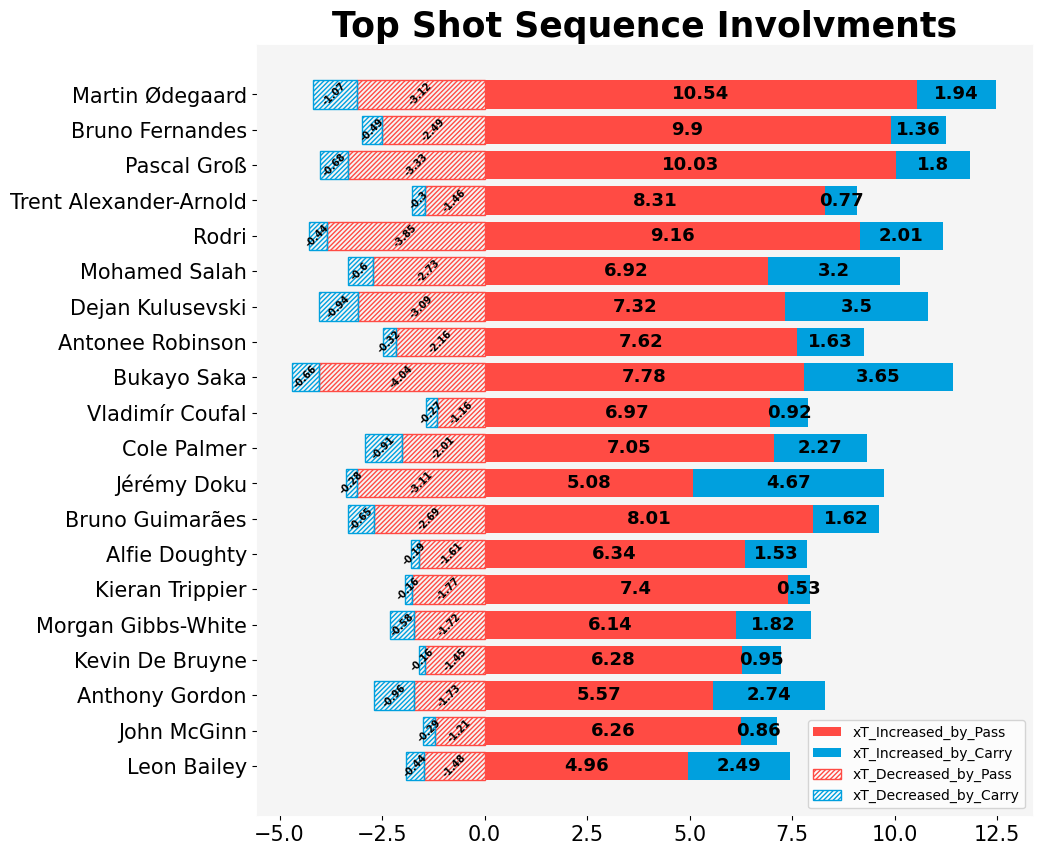

In [80]:
def xT_bar(ax):
    top_players = xT_df.nsmallest(20, 'total')['name'].tolist()

    list_1 = xT_df.nsmallest(20, 'total')['xT_Increased_by_Pass'].tolist()
    list_2 = xT_df.nsmallest(20, 'total')['xT_Increased_by_Carry'].tolist()
    list_3 = xT_df.nsmallest(20, 'total')['xT_Decreased_by_Pass'].tolist()
    list_4 = xT_df.nsmallest(20, 'total')['xT_Decreased_by_Carry'].tolist()

    left1 = [w + x for w, x in zip(list_1, list_2)]

    ax.barh(top_players, list_1, label='xT_Increased_by_Pass', color=col1, left=0)
    ax.barh(top_players, list_2, label='xT_Increased_by_Carry', color=col2, left=list_1)
    ax.barh(top_players, list_3, label='xT_Decreased_by_Pass', color='None', edgecolor=col1, hatch='///////', left=0)
    ax.barh(top_players, list_4, label='xT_Decreased_by_Carry', color='None', edgecolor=col2, hatch='///////', left=list_3)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top_players):
        for j, count in enumerate([list_1[i], list_2[i]]):
            if count > 0:
                x_position = sum([list_1[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=line_color, fontsize=13, fontweight='bold')

    # Add counts in the middle of the bars (if count < 0)
    for i, player in enumerate(top_players):
        for j, count in enumerate([list_3[i], list_4[i]]):
            if count < 0:
                x_position = sum([list_3[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', rotation=45, color=line_color, fontsize=7, fontweight='bold')

    # max_x = xT_df['total'].iloc()[0]
    # x_coord = [50 * i for i in range(1, int(max_x/50))]
    # for x in x_coord:
    #     ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

    ax.set_facecolor(bg_color)
    ax.tick_params(axis='x', colors=line_color, labelsize=15)
    ax.tick_params(axis='y', colors=line_color, labelsize=15)
    ax.xaxis.label.set_color(line_color)
    ax.yaxis.label.set_color(line_color)
    for spine in ax.spines.values():
        spine.set_edgecolor(bg_color)

    ax.set_title(f"Top Shot Sequence Involvments", color=line_color, fontsize=25, fontweight='bold')
    ax.legend()

fig,ax=plt.subplots(figsize=(10,10))
xT_bar(ax)